## Волкова ПМ18-4

In [62]:
from bs4 import BeautifulSoup 
import numpy as np 
import pandas as pd 
import requests 


In [63]:
base_link = 'https://spb.cian.ru/cat.php?deal_type=sale&district%5B0%5D=138&engine_version=2&offer_type=flat&room1=1&room2=1&room3=1&room4=1&room5=1&room6=1&room7=1&room9=1/p='
n_pages = 45
pages = [i for i in range(n_pages)]

In [64]:
def parse_page(pages = pages):
    flat_links = []
    
    for i in range(len(pages)):
        link = str(base_link + str(i+1))
        page_text = requests.get(link).text
        soup = BeautifulSoup(page_text)
        for link in soup.find_all('a', class_ = '_93444fe79c--link--39cNw'):
            flat_links.append(link.get('href'))
            
    return flat_links

def parse_flat(links):
    prices = []
    squares = []
    undergrounds = []
    distances = []
    address = []
    flat_types = []
    rooms = []
    fl = []
    
    for flat in links:
        flat_temp = requests.get(flat).text
        flat_soup = BeautifulSoup(flat_temp)
        
        try:
            prices.append(flat_soup.find('span', class_ = 'a10a3f92e9--price_value--1iPpd').text)
        except:
            prices.append(np.nan)
        
        try:
            squares.append(flat_soup.find('div', class_ = 'a10a3f92e9--info-value--18c8R').text)
        except:
            squares.append(np.nan)
        
        try:
            undergrounds.append(flat_soup.find('a', class_ = 'a10a3f92e9--underground_link--AzxRC').text)
        except:
            undergrounds.append(np.nan)
        
        try:    
            distances.append(flat_soup.find('span', class_ = 'a10a3f92e9--underground_time--1fKft').text)
        except:
            distances.append(np.nan)
        
        try:
            address.append(flat_soup.find('address', class_ = 'a10a3f92e9--address--140Ec').text)
        except:
            address.append(np.nan)
         
        try:
            flat_types.append(flat_soup.find('span', class_ = 'a10a3f92e9--value--3Ftu5').text)
        except:
            flat_types.append(np.nan)
        
        try:
            rooms.append(flat_soup.find('h1', class_ = 'a10a3f92e9--title--2Widg').text.split(',')[0])
        except:
            rooms.append(np.nan)
        
        try:
            fl.append(flat)
        except:
            fl.append(np.nan)
        
    flat_data = pd.DataFrame({'address':address,
                              'price':prices,
                              'squares':squares,
                              'underground':undergrounds,
                              'distance':distances,
                              'flat type':flat_types,
                              'rooms':rooms,
                             'flat link':fl})
    return flat_data

In [65]:
data = parse_flat(links = parse_page())
data.to_csv('parse_data.csv') # сохранение результатов парсинга

In [66]:
data.head()

,address,price,squares,underground,distance,flat type,rooms,flat link
0,"Санкт-Петербург, р-н Петроградский, Петровский...",28 477 863 ₽,"156,3 м²",Чкаловская,⋅ 5 мин. пешком,Новостройка,3-комн. квартира,https://spb.cian.ru/sale/flat/247957705/
1,"Санкт-Петербург, р-н Петроградский, Петровский...",85 000 000 ₽,"247,8 м²",Спортивная,⋅ 2 мин. на транспорте,Вторичка,3-комн. квартира,https://spb.cian.ru/sale/flat/248752891/
2,"Санкт-Петербург, р-н Петроградский, Петровский...",55 000 000 ₽,180 м²,Спортивная,⋅ 2 мин. на транспорте,Вторичка,2-комн. квартира,https://spb.cian.ru/sale/flat/248683164/
3,"Санкт-Петербург, р-н Петроградский, Петровский...",55 000 000 ₽,144 м²,Крестовский остров,⋅ 22 мин. пешком,Вторичка,4-комн. квартира,https://spb.cian.ru/sale/flat/245049249/
4,"Санкт-Петербург, р-н Петроградский, Петровский...",27 174 024 ₽,"129,75 м²",Спортивная,⋅ 2 мин. на транспорте,Новостройка,3-комн. квартира,https://spb.cian.ru/sale/flat/238181194/


In [67]:
data.shape

(1260, 8)

In [80]:
adr = data["address"].unique()
places = [data["address"][j].split(",")[-2] for j in range(len(data["address"].unique()))]

In [81]:
val = []
for elem in adr:
    temp = 0
    for el in elem.split(" "):
        if "." in el:
            temp = el 
            val.append(temp)
    if temp == 0:
        val.append("просп.")

In [82]:
d = dict(zip(adr, val))

In [83]:
d

{'Санкт-Петербург, р-н Петроградский, Петровский, Малая Разночинная ул., 10На карте': 'ул.,',
 'Санкт-Петербург, р-н Петроградский, Петровский, Ждановская ул., 45На карте': 'ул.,',
 'Санкт-Петербург, р-н Петроградский, Петровский, Пионерская ул., 50На карте': 'ул.,',
 'Санкт-Петербург, р-н Петроградский, Петровский, Петровский просп.На карте': 'просп.На',
 'Санкт-Петербург, р-н Петроградский, Чкаловское, наб. Адмирала Лазарева, 22На карте': 'наб.',
 'Санкт-Петербург, р-н Петроградский, Петровский, Нева Хаус жилой комплексНа карте': 'просп.',
 'Санкт-Петербург, р-н Петроградский, Чкаловское, Спортивная ул., 2На карте': 'ул.,',
 'Санкт-Петербург, р-н Петроградский, Чкаловское, Корпусная ул., 9На карте': 'ул.,',
 'Санкт-Петербург, р-н Петроградский, Чкаловское, Ждановская ул., 29На карте': 'ул.,',
 'Санкт-Петербург, р-н Петроградский, Петровский, Петровский просп., 11На карте': 'просп.,',
 'Санкт-Петербург, р-н Петроградский, Чкаловское, Барочная ул., 4аШНа карте': 'ул.,',
 'Санкт-Петербу

In [91]:
data["address"] = data["address"].replace(d)

In [92]:
data.head()

,address,price,squares,underground,distance,flat type,rooms,flat link
0,"ул.,",28 477 863 ₽,"156,3 м²",Чкаловская,⋅ 5 мин. пешком,Новостройка,3-комн. квартира,https://spb.cian.ru/sale/flat/247957705/
1,"ул.,",85 000 000 ₽,"247,8 м²",Спортивная,⋅ 2 мин. на транспорте,Вторичка,3-комн. квартира,https://spb.cian.ru/sale/flat/248752891/
2,"ул.,",55 000 000 ₽,180 м²,Спортивная,⋅ 2 мин. на транспорте,Вторичка,2-комн. квартира,https://spb.cian.ru/sale/flat/248683164/
3,"ул.,",55 000 000 ₽,144 м²,Крестовский остров,⋅ 22 мин. пешком,Вторичка,4-комн. квартира,https://spb.cian.ru/sale/flat/245049249/
4,просп.На,27 174 024 ₽,"129,75 м²",Спортивная,⋅ 2 мин. на транспорте,Новостройка,3-комн. квартира,https://spb.cian.ru/sale/flat/238181194/


In [93]:
data = data.drop("flat link", axis = 1)

In [94]:
data.head()

,address,price,squares,underground,distance,flat type,rooms
0,"ул.,",28 477 863 ₽,"156,3 м²",Чкаловская,⋅ 5 мин. пешком,Новостройка,3-комн. квартира
1,"ул.,",85 000 000 ₽,"247,8 м²",Спортивная,⋅ 2 мин. на транспорте,Вторичка,3-комн. квартира
2,"ул.,",55 000 000 ₽,180 м²,Спортивная,⋅ 2 мин. на транспорте,Вторичка,2-комн. квартира
3,"ул.,",55 000 000 ₽,144 м²,Крестовский остров,⋅ 22 мин. пешком,Вторичка,4-комн. квартира
4,просп.На,27 174 024 ₽,"129,75 м²",Спортивная,⋅ 2 мин. на транспорте,Новостройка,3-комн. квартира


In [104]:
from functools import reduce
# data['squares'] = [float(data['squares'][i].split()[0].replace(",",'.')) for i in range(len(data['squares']))]

data['price'] = [data['price'][i].split('₽')[0] for i in range(len(data['price']))]
data['price'] = [int(reduce(lambda x,y: x + y,data['price'][i].split())) for i in range(len(data['price']))]

In [103]:
data['squares']

0       156.30
1       247.80
2       180.00
3       144.00
4       129.75
         ...  
1255    133.80
1256    186.00
1257    123.00
1258    216.00
1259     54.48
Name: squares, Length: 1260, dtype: float64

In [105]:
data.head()

,address,price,squares,underground,distance,flat type,rooms
0,"ул.,",28477863,156.30,Чкаловская,⋅ 5 мин. пешком,Новостройка,3-комн. квартира
1,"ул.,",85000000,247.80,Спортивная,⋅ 2 мин. на транспорте,Вторичка,3-комн. квартира
2,"ул.,",55000000,180.00,Спортивная,⋅ 2 мин. на транспорте,Вторичка,2-комн. квартира
3,"ул.,",55000000,144.00,Крестовский остров,⋅ 22 мин. пешком,Вторичка,4-комн. квартира
4,просп.На,27174024,129.75,Спортивная,⋅ 2 мин. на транспорте,Новостройка,3-комн. квартира


In [129]:
data["distance"] = [float(reduce(lambda x,y: x + y, (elem[0].split(" "))).split("⋅")[-1]) for elem in [str(el).split("мин.") for el in data["distance"]]]

In [131]:
data.dropna()

,address,price,squares,underground,distance,flat type,rooms
0,"ул.,",28477863,156.30,Чкаловская,5.0,Новостройка,3-комн. квартира
1,"ул.,",85000000,247.80,Спортивная,2.0,Вторичка,3-комн. квартира
2,"ул.,",55000000,180.00,Спортивная,2.0,Вторичка,2-комн. квартира
3,"ул.,",55000000,144.00,Крестовский остров,22.0,Вторичка,4-комн. квартира
4,просп.На,27174024,129.75,Спортивная,2.0,Новостройка,3-комн. квартира
...,...,...,...,...,...,...,...
1254,наб.,90000000,170.00,Зенит,4.0,Вторичка,4-комн. квартира
1255,наб.,87561062,133.80,Крестовский остров,16.0,Новостройка Апартаменты,2-комн. апартаменты
1256,просп.,63000000,186.00,Чкаловская,2.0,Вторичка,3-комн. квартира
1257,"ул.,",65000000,123.00,Спортивная,6.0,Вторичка,3-комн. квартира


In [132]:
data.head()

,address,price,squares,underground,distance,flat type,rooms
0,"ул.,",28477863,156.30,Чкаловская,5.0,Новостройка,3-комн. квартира
1,"ул.,",85000000,247.80,Спортивная,2.0,Вторичка,3-комн. квартира
2,"ул.,",55000000,180.00,Спортивная,2.0,Вторичка,2-комн. квартира
3,"ул.,",55000000,144.00,Крестовский остров,22.0,Вторичка,4-комн. квартира
4,просп.На,27174024,129.75,Спортивная,2.0,Новостройка,3-комн. квартира


In [133]:
data['rooms'] = data['rooms'].replace(
    ['Апартаменты свободной планировки','Апартаменты-студия','Студия','Квартира свободной планировки','Многокомнатная квартира','Многокомнатные апартаменты'],
    ['1-комн. апартаменты','1-комн. апартаменты','1-комн. квартира','2-комн. квартира','3-комн. квартира','3-комн. апартаменты'])
data['property type'] = [data['rooms'][i].split('.')[1] for i in range(len(data['rooms'])) ]
data['rooms'] = [int(data['rooms'][i][0]) for i in range(len(data['rooms'])) ]

In [134]:
data.head()

,address,price,squares,underground,distance,flat type,rooms,property type
0,"ул.,",28477863,156.30,Чкаловская,5.0,Новостройка,3,квартира
1,"ул.,",85000000,247.80,Спортивная,2.0,Вторичка,3,квартира
2,"ул.,",55000000,180.00,Спортивная,2.0,Вторичка,2,квартира
3,"ул.,",55000000,144.00,Крестовский остров,22.0,Вторичка,4,квартира
4,просп.На,27174024,129.75,Спортивная,2.0,Новостройка,3,квартира


In [135]:
data.to_csv("data.csv")
## Категоризация данных: 

In [161]:
data = pd.read_csv("data.csv")

In [163]:
data = data.drop("Unnamed: 0", axis = 1)
data.head()

,address,price,squares,underground,distance,flat type,rooms,property type
0,"ул.,",28477863,156.30,Чкаловская,5.0,Новостройка,3,квартира
1,"ул.,",85000000,247.80,Спортивная,2.0,Вторичка,3,квартира
2,"ул.,",55000000,180.00,Спортивная,2.0,Вторичка,2,квартира
3,"ул.,",55000000,144.00,Крестовский остров,22.0,Вторичка,4,квартира
4,просп.На,27174024,129.75,Спортивная,2.0,Новостройка,3,квартира


In [164]:
## Диаграмма шумов 
import seaborn as sns 

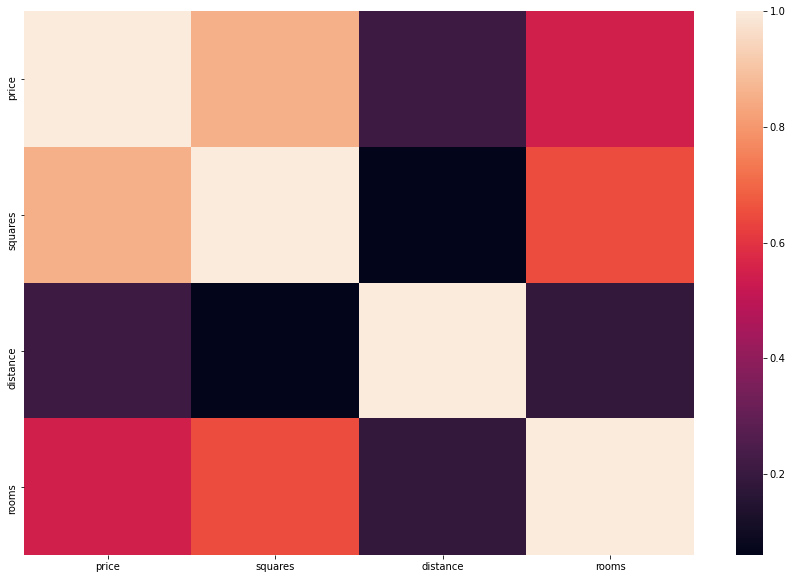

In [165]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

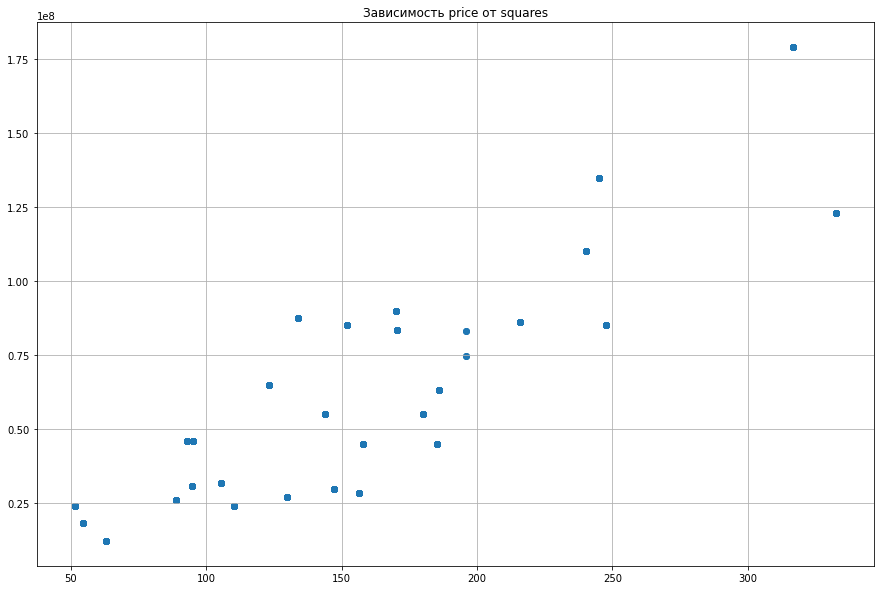

In [166]:
## На price больше всего влияет squares: 

plt.figure(figsize = (15,10))
plt.scatter(data["squares"], data["price"]) 
plt.title("Зависимость price от squares")
plt.grid()

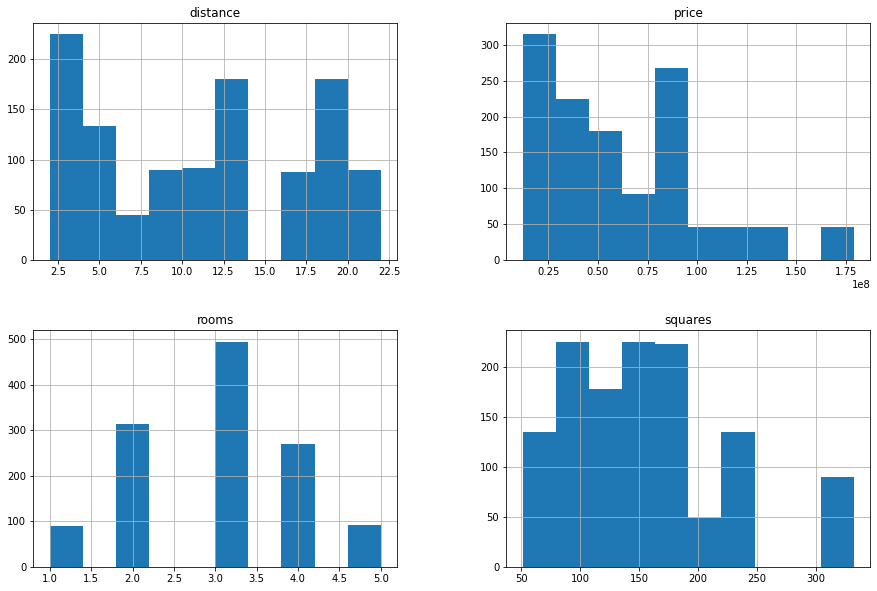

In [167]:
data.hist()
fig = plt.gcf()
fig.set_size_inches(15,10)

In [168]:
## Категоризация данных: 

In [169]:
for name in pd.unique(data["underground"].tolist()):
    data[name] = [1 if name == data["underground"][i] else 0 for i in data.index]

In [170]:
data.head()

,address,price,squares,underground,distance,flat type,rooms,property type,Чкаловская,Спортивная,Крестовский остров,Петроградская,Черная речка,Горьковская,Зенит
0,"ул.,",28477863,156.30,Чкаловская,5.0,Новостройка,3,квартира,1,0,0,0,0,0,0
1,"ул.,",85000000,247.80,Спортивная,2.0,Вторичка,3,квартира,0,1,0,0,0,0,0
2,"ул.,",55000000,180.00,Спортивная,2.0,Вторичка,2,квартира,0,1,0,0,0,0,0
3,"ул.,",55000000,144.00,Крестовский остров,22.0,Вторичка,4,квартира,0,0,1,0,0,0,0
4,просп.На,27174024,129.75,Спортивная,2.0,Новостройка,3,квартира,0,1,0,0,0,0,0


In [172]:
data["property type"] = [1 if el == " апартаменты" else 0 for el in data["property type"].tolist()]

In [173]:
data.head()

,address,price,squares,underground,distance,flat type,rooms,property type,Чкаловская,Спортивная,Крестовский остров,Петроградская,Черная речка,Горьковская,Зенит
0,"ул.,",28477863,156.30,Чкаловская,5.0,Новостройка,3,0,1,0,0,0,0,0,0
1,"ул.,",85000000,247.80,Спортивная,2.0,Вторичка,3,0,0,1,0,0,0,0,0
2,"ул.,",55000000,180.00,Спортивная,2.0,Вторичка,2,0,0,1,0,0,0,0,0
3,"ул.,",55000000,144.00,Крестовский остров,22.0,Вторичка,4,0,0,0,1,0,0,0,0
4,просп.На,27174024,129.75,Спортивная,2.0,Новостройка,3,0,0,1,0,0,0,0,0


In [175]:
data["address"] = data["address"].replace({"просп.На": "просп."})

In [177]:
data = data.drop("underground", axis = 1)

In [178]:
data = data.drop("property type", axis = 1)

In [179]:
data

,address,price,squares,distance,flat type,rooms,Чкаловская,Спортивная,Крестовский остров,Петроградская,Черная речка,Горьковская,Зенит
0,"ул.,",28477863,156.30,5.0,Новостройка,3,1,0,0,0,0,0,0
1,"ул.,",85000000,247.80,2.0,Вторичка,3,0,1,0,0,0,0,0
2,"ул.,",55000000,180.00,2.0,Вторичка,2,0,1,0,0,0,0,0
3,"ул.,",55000000,144.00,22.0,Вторичка,4,0,0,1,0,0,0,0
4,просп.,27174024,129.75,2.0,Новостройка,3,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,наб.,87561062,133.80,16.0,Новостройка Апартаменты,2,0,0,1,0,0,0,0
1256,просп.,63000000,186.00,2.0,Вторичка,3,1,0,0,0,0,0,0
1257,"ул.,",65000000,123.00,6.0,Вторичка,3,0,1,0,0,0,0,0
1258,"просп.,",86000000,216.00,NaN,Вторичка Пентхаус,5,0,1,0,0,0,0,0


In [180]:
for name in pd.unique(data["flat type"].tolist()):
    data[name] = [1 if name == data["flat type"][i] else 0 for i in data.index]

In [183]:
data = data.drop("flat type", axis = 1)

In [184]:
data = data.dropna()

In [187]:
for name in pd.unique(data["address"].tolist()):
    data[name] = [1 if name == data["address"][i] else 0 for i in data.index]

In [189]:
data = data.drop("address", axis = 1)

In [190]:
data

,price,squares,distance,rooms,Чкаловская,Спортивная,Крестовский остров,Петроградская,Черная речка,Горьковская,Зенит,Новостройка,Вторичка,Новостройка Апартаменты,Вторичка Пентхаус,"ул.,",просп.,наб.,"просп.,",ул.
0,28477863,156.30,5.0,3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,85000000,247.80,2.0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,55000000,180.00,2.0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,55000000,144.00,22.0,4,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,27174024,129.75,2.0,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,90000000,170.00,4.0,4,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1255,87561062,133.80,16.0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1256,63000000,186.00,2.0,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1257,65000000,123.00,6.0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [191]:
data.to_csv("data_clean_cean_spb")

In [309]:
X = data.drop("price", axis = 1)
y = data["price"]

In [310]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge, LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as rmse

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)

In [312]:
# X = StandardScaler().fit_transform(X)

In [313]:
## Линейная модель:
LR = Ridge()
LR.fit(X_train, y_train)

Ridge()

In [314]:
print("Коэффициент детерминации: " + str(LR.score(X_test, y_test)))

Коэффициент детерминации: 0.9107787066719154


In [315]:
print("RMSE: " + str(np.sqrt(rmse(y_test, LR.predict(X_test), squared = True)) ))

RMSE: 10276812.038408691


In [316]:
## Соседи: 
Knn = KNeighborsRegressor(
    n_neighbors = 33
)
Knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=33)

In [317]:
print("Коэффициент детерминации: " + str(Knn.score(X_test, y_test)))
print("RMSE: " + str(np.sqrt(rmse(y_test, Knn.predict(X_test), squared = True)) ))

Коэффициент детерминации: 0.9711986584591696
RMSE: 5838892.975228873


In [318]:
## Decision Tree
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [319]:
RF = RandomForestRegressor(
    n_estimators = 500 )
RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [320]:
print("Коэффициент детерминации: " + str(RF.score(X_test, y_test)))
print("RMSE: " + str(np.sqrt(rmse(y_test, RF.predict(X_test), squared = True)) ))

Коэффициент детерминации: 0.9998495487477776
RMSE: 422009.33674064477


In [328]:
y_pred = LR.predict(X_test)

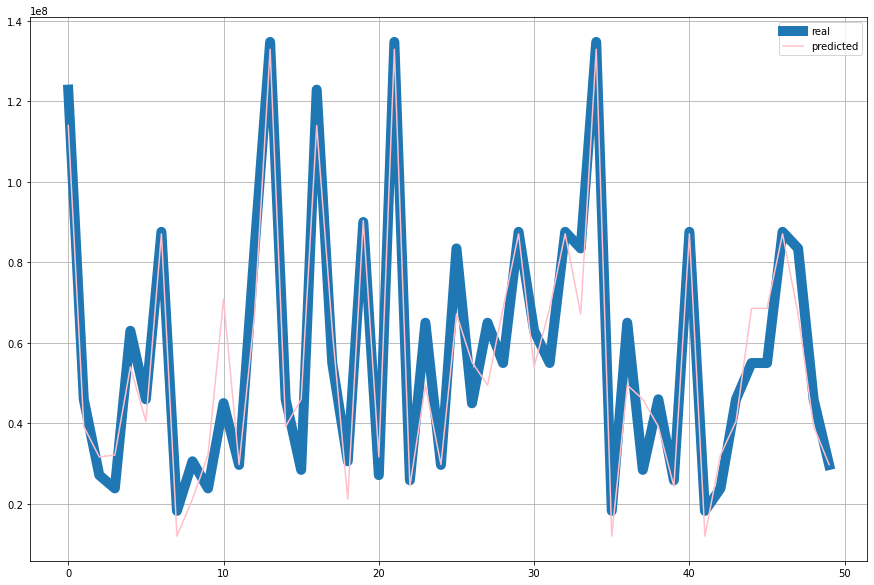

In [333]:
n = 50
plt.figure(figsize = (15,10))
plt.grid()
y_test = y_test[:n]
y_pred = y_pred[:n]
plt.plot([x for x in range(n)],y_test, linewidth = 10, label = "real")
plt.plot([x for x in range(n)],y_pred, c = "pink", label = "predicted")
plt.legend()

In [334]:
## Кластеризация: 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE

In [336]:
X = StandardScaler().fit_transform(X)

In [337]:
X

array([[ 0.12168937, -0.8606061 ,  0.11713689, ..., -0.36339572,
        -0.43689835, -0.37275358],
       [ 1.50678191, -1.32824835,  0.11713689, ..., -0.36339572,
        -0.43689835, -0.37275358],
       [ 0.48045105, -1.32824835, -0.88702131, ..., -0.36339572,
        -0.43689835, -0.37275358],
       ...,
       [ 0.57127679, -1.32824835,  0.11713689, ..., -0.36339572,
        -0.43689835, -0.37275358],
       [-0.38239349, -0.70472535,  0.11713689, ..., -0.36339572,
        -0.43689835, -0.37275358],
       [-1.41962344,  1.16584365, -1.89117952, ..., -0.36339572,
         2.28886192, -0.37275358]])

In [340]:
X_embedded = TSNE(n_components=2, random_state = 22).fit_transform(X)

X_train, X_test = train_test_split(X_embedded, random_state = 42, test_size = 0.2)

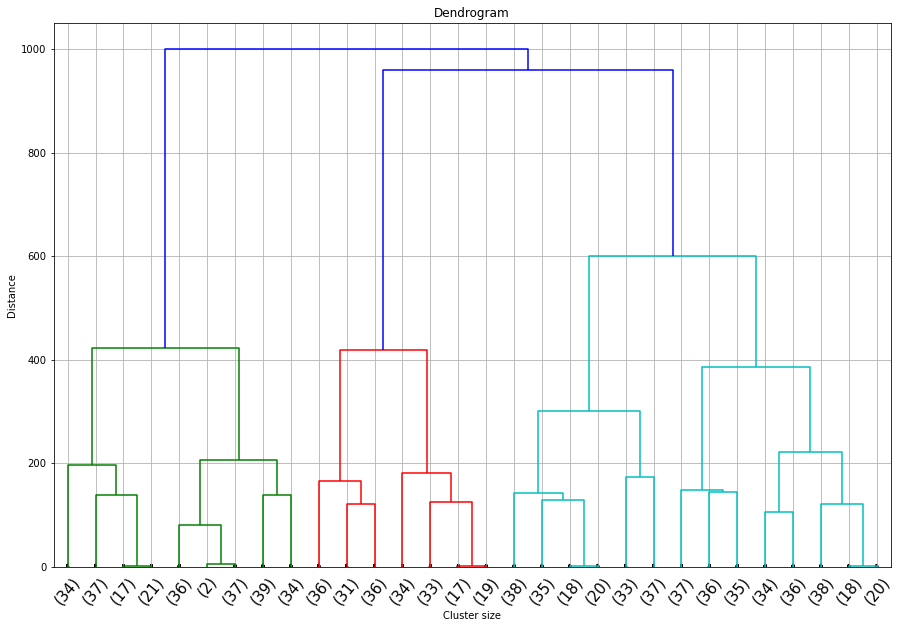

In [341]:
Z  = linkage(X_train,'ward')
dendrogram(Z, truncate_mode = 'lastp', leaf_rotation = 50. , leaf_font_size = 15., show_contracted = True)

plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(15,10)

In [342]:
## Оценим количество кластеров с помошью метода локтя 

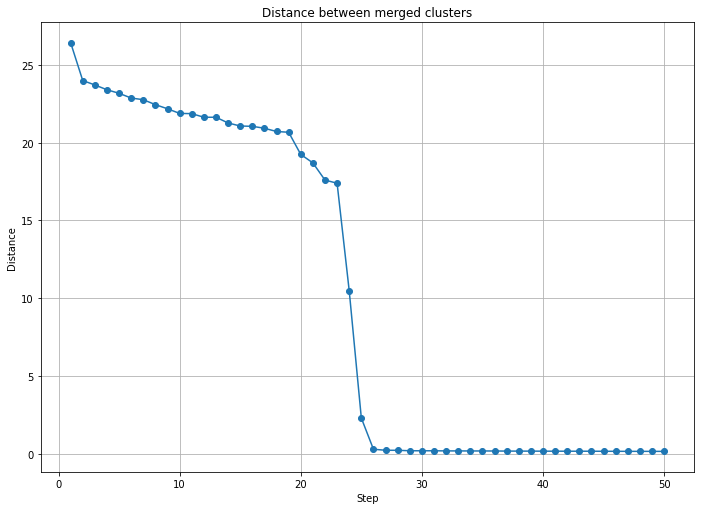

In [343]:
link = linkage(X_embedded)
dist = link[-50:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.grid()

In [344]:
## ~ 20 кластеров 

In [351]:
KM = KMeans(n_clusters = 3).fit(X_train)
pred = model.predict(X_test)

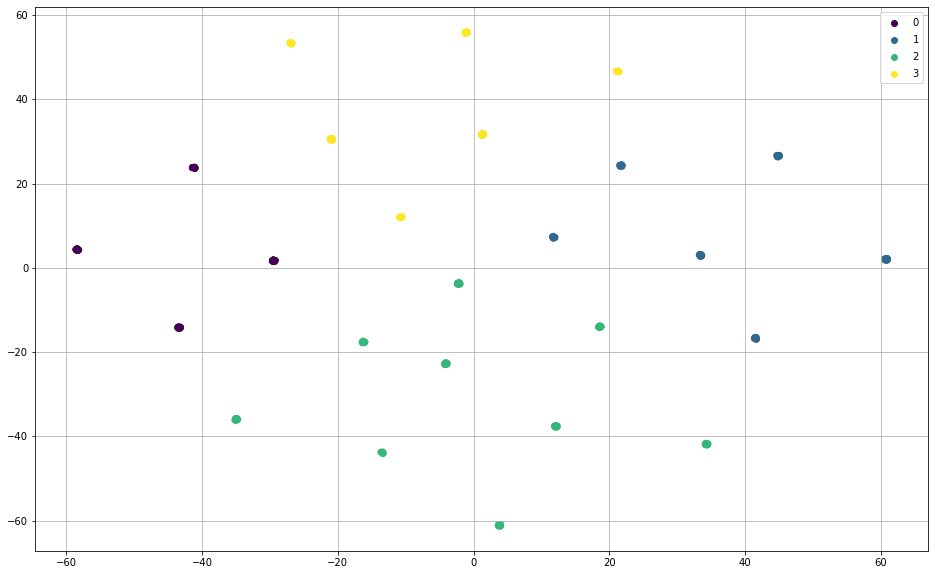

In [353]:
fig = plt.gcf()
fig.set_size_inches(16,10)
p = plt.scatter( x = [x[0] for x in X_test],y =[x[1] for x in X_test],  c = pred, label = pred)
a = p.legend_elements(prop = 'colors')
plt.grid()
plt.legend(*a)